<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 01 - Data exploration and preprocessing
</div>

# **Data exploration**

**1. Import libraries**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

**2. Read data**

In [3]:
raw_data = pd.read_csv('../data/data.csv')
raw_data

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,California,Female,Excellent,NaN,3.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.60,67.13,26.22,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
1,California,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.83,86.18,25.77,No,Yes,No,No,"Yes, received Tdap",No,No
2,California,Female,Very good,0.0,0.0,Within past 2 years (1 year but less than 2 ye...,No,8.0,1 to 5,No,...,1.63,55.79,21.11,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
3,California,Female,Good,0.0,30.0,Within past year (anytime less than 12 months ...,No,7.0,None of them,No,...,1.75,72.57,23.63,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
4,California,Male,Good,12.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.73,65.77,22.05,Yes,No,Yes,Yes,NaN,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10947,California,Male,Good,0.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.83,65.77,19.67,Yes,Yes,No,Yes,"Yes, received Tdap",No,No
10948,California,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,8.0,None of them,No,...,1.78,90.72,28.70,Yes,NaN,Yes,Yes,NaN,No,Tested positive using home test without a heal...
10949,California,Female,Fair,5.0,5.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.57,68.04,27.44,No,No,Yes,NaN,"No, did not receive any tetanus shot in the pa...",No,Yes
10950,California,Female,Excellent,0.0,2.0,Within past 2 years (1 year but less than 2 ye...,Yes,10.0,None of them,No,...,1.75,58.97,19.20,No,Yes,No,NaN,"Yes, received Tdap",No,Yes


**3. How many rows and how many columns does the raw data have?**
- First, we should find out our dataset contains.

In [4]:
# Todo
raw_data.shape

(10952, 40)

We can see in this dataset, there are
- `10952 rows`
- `40 columns`

**4. What are the meanings of each row?**

Each row in the dataset represents the **information of an individual** in the state of **California**, USA. The information includes the state, gender, general health status, number of days affected by physical and mental health, last health checkup time, physical activities, sleep hours, medical history, and other health-related factors.

**5. Does the raw data have duplicate rows?**

In [5]:
# Todo
def check_duplicates(data):
    duplicate_rows = data[data.duplicated()]
    if duplicate_rows.empty:
        print('No duplicate rows found')
    else:
        print('Duplicate rows found')
        print(duplicate_rows)
    return duplicate_rows
duplicates = check_duplicates(raw_data)

Duplicate rows found
           State     Sex GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
2341  California    Male     Excellent                 0.0               0.0   
3474  California    Male     Excellent                 0.0               0.0   
6846  California  Female           NaN                 NaN               NaN   
9779  California    Male     Excellent                 0.0               0.0   

                                        LastCheckupTime PhysicalActivities  \
2341  Within past year (anytime less than 12 months ...                Yes   
3474  Within past year (anytime less than 12 months ...                Yes   
6846                                                NaN                NaN   
9779  Within past year (anytime less than 12 months ...                Yes   

      SleepHours  RemovedTeeth HadHeartAttack  ... HeightInMeters  \
2341         7.0  None of them             No  ...            NaN   
3474         7.0  None of them             No  ..

**6. What does each column mean?**

In [6]:
raw_data.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

Describe meaning of each column

In [7]:
col_meaning_df = pd.read_csv('../data/schema.csv')
pd.set_option("display.max_colwidth", None)
col_meaning_df

,Column,Meaning
0,State,State FIPS Code
1,Sex,Sex of Respondent
2,GeneralHealth,Would you say that in general your health is:
3,PhysicalHealthDays,"Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?"
4,MentalHealthDays,"Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?"
5,LastCheckupTime,About how long has it been since you last visited a doctor for a routine checkup?
6,PhysicalActivities,"During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise?"
7,SleepHours,"On average, how many hours of sleep do you get in a 24-hour period?"
8,RemovedTeeth,"Not including teeth lost for injury or orthodontics, how many of your permanent teeth have been removed because of tooth decay or gum disease?"
9,HadHeartAttack,"(Ever told) you had a heart attack, also called a myocardial infarction?"


**7. What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?**

In [8]:
raw_data.dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

**8. With each numerical column, how are values distributed?**
- What is the percentage of missing values?
- Min? max? Are they abnormal?

### Select numeric columns

In [9]:
num_col_df = raw_data.select_dtypes(include='float64')
num_col_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,NaN,3.0,7.0,1.60,67.13,26.22
1,0.0,0.0,6.0,1.83,86.18,25.77
2,0.0,0.0,8.0,1.63,55.79,21.11
3,0.0,30.0,7.0,1.75,72.57,23.63
4,12.0,0.0,8.0,1.73,65.77,22.05
...,...,...,...,...,...,...
10947,0.0,3.0,5.0,1.83,65.77,19.67
10948,0.0,0.0,8.0,1.78,90.72,28.70
10949,5.0,5.0,7.0,1.57,68.04,27.44
10950,0.0,2.0,10.0,1.75,58.97,19.20


### Explore the distribution using descriptive statistics. With each numerical column, how are values distributed?
- What is the percentage of missing values?
- If there are missing values, handle them.
- Min? max? Are they abnormal?
- Missing value treatment

In [10]:
def missing_ratio(col):
    return (col.isna().sum() * 100 / len(col)).round(1)

def lower_quartile(col):
    return col.quantile(0.25).round(1)

def upper_quartile(col):
    return col.quantile(0.75).round(1)

num_col_info_df = num_col_df.agg([missing_ratio, 'min', lower_quartile, 'median', upper_quartile, 'max'])
num_col_info_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
missing_ratio,4.6,3.8,1.5,9.60,10.40,13.60
min,0.0,0.0,1.0,1.25,25.40,12.21
lower_quartile,0.0,0.0,6.0,1.60,65.80,23.30
median,0.0,0.0,7.0,1.70,77.11,26.58
upper_quartile,4.0,5.0,8.0,1.80,90.70,30.40
max,30.0,30.0,24.0,2.36,272.16,91.45


**Observation:**
- The percentage of missing values of each numeric column is low so we won't drop any of these columns. Instead, we try to handle these missing values.
- The minimum and maximum values of each numeric column are within normal ranges:
    - There are no negative numbers.
    - PhysicalHealthDays and MentalHealthDays both have values equal or less than 30.
    - SleepHours have values equal or less than 24.
    - Three remaining columns also have reasonable values.
- Based on upper-quartile values and max values, we can see PhysicalHealthDays, MentalHealthDays, SleepHours, WeightInKilograms and BMI have right-skewed distributions as upper-quartile values are far from max values.
- Because of that, we will fill missing values in these columns with the median (an indicator that is insensitive with outliers).

### Visualize missing ratio

In [11]:
data = num_col_info_df.loc['missing_ratio']
fig = px.bar(x=data.index, y=data.values, width=1000, height=500, labels={'x': 'Numeric column', 'y': 'Percentage(%)'}, 
             title='Missing ratio of numeric columns')
fig.show()

After handling missing values, we will check missing-ratio again to ensure that we have handle missing values successfully.

In [13]:
non_nan_num_cols = raw_data[num_col_df.columns] 
non_nan_num_col_info_df = non_nan_num_cols.agg([missing_ratio, 'min', lower_quartile, 'median', upper_quartile, 'max'])
non_nan_num_col_info_df

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
missing_ratio,0.0,0.0,0.0,0.00,0.00,0.00
min,0.0,0.0,1.0,1.25,25.40,12.21
lower_quartile,0.0,0.0,6.0,1.60,68.00,23.80
median,0.0,0.0,7.0,1.70,77.11,26.58
upper_quartile,3.0,5.0,8.0,1.80,90.30,29.80
max,30.0,30.0,24.0,2.36,272.16,91.45


Now there are no missing values. 

### Visualize the distribution 

We will use **histogram** to visualize the distributions of numeric columns and provide insights we can gain from them.

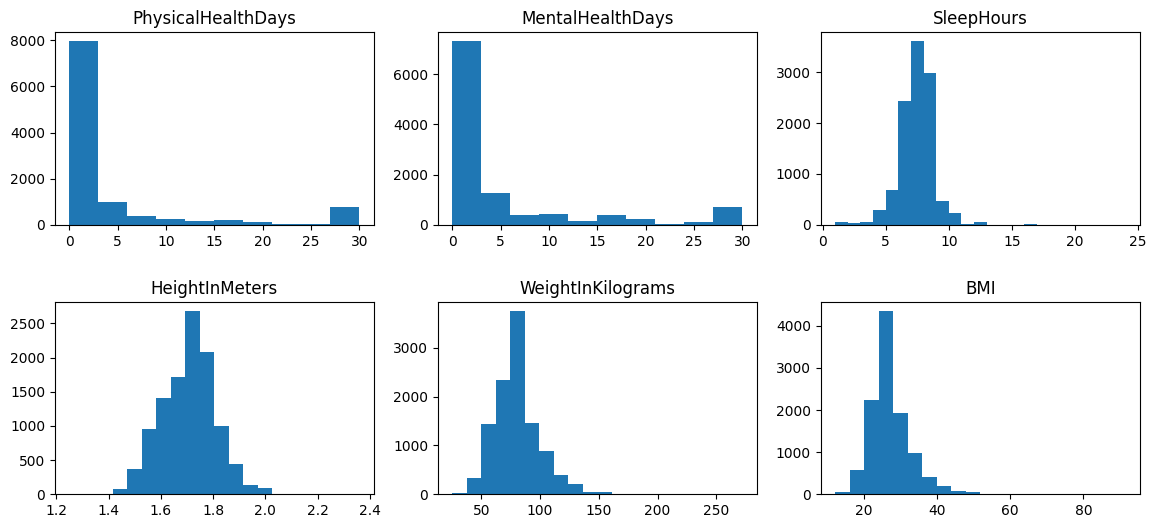

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.4)

bin_nums = [10, 10, 23, 20, 20, 20]
for i in range(len(axes)):
    axes[i].hist(raw_data[non_nan_num_cols.columns[i]], bins=bin_nums[i])
    axes[i].set_title(non_nan_num_cols.columns[i]);

**Observation**:
- The physical health of people in California is generally good, as most of them experienced physical health problems for less than 6 days.
- The number of people experiencing mental health problems for more than 6 days is quite higher than that of physical health problems. It can be observed that mental health problems often persist for a longer duration compared to physical health problems.
- The distribution of the SleepHours column is narrow, indicating that most people in California have average sleep hours around 6 to 9 hours per day, which is good for health.
- The height of people in California is various, but focused mainly in the range of 1.5 to 1.85 meters.
- Similarly, the weight and BMI are primarily centered in the range of 50 to 112 kilograms and 20 to 35.

**9. With each catagorical column, how are values distributed?**
- What is the percentage of missing values?
- How many different values? Show a few
- Are they abnormal?

- What is the percentage of missing values?

*Select catagorical columns*

In [15]:
# Select catagorical columns in data
cat_col_df = raw_data.select_dtypes(include = ['object'])
cat_col_df.head(5)

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,California,Female,Excellent,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 70 to 74,Yes,No,Yes,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No
1,California,Male,Very good,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,...,No,Hispanic,Age 40 to 44,No,Yes,No,No,"Yes, received Tdap",No,No
2,California,Female,Very good,Within past 2 years (1 year but less than 2 years ago),No,1 to 5,No,No,No,Yes,...,No,"White only, Non-Hispanic",Age 75 to 79,No,No,No,Yes,"No, did not receive any tetanus shot in the past 10 years",No,No
3,California,Female,Good,Within past year (anytime less than 12 months ago),No,None of them,No,No,No,No,...,No,"Black only, Non-Hispanic",Age 80 or older,No,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No
4,California,Male,Good,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 75 to 79,Yes,No,Yes,Yes,NaN,Yes,No


In [16]:
# Function 
def missing_ratio(col):
    return (col.isnull().mean()*100).round(2)

def value_ratios(col):
    percentage = (col.value_counts(normalize=True)*100).round(2)
    return percentage.to_dict()

In [17]:
# Calculate missing ratio for catagorical columns
cat_missing_ratio = cat_col_df.agg(missing_ratio)
# Print the result
print("The percentage of missing values:")
for col, ratio in cat_missing_ratio.items():
    print(f"- {col}: {ratio}%")

The percentage of missing values:
- State: 0.0%
- Sex: 0.0%
- GeneralHealth: 0.35%
- LastCheckupTime: 2.68%
- PhysicalActivities: 0.42%
- RemovedTeeth: 2.26%
- HadHeartAttack: 0.9%
- HadAngina: 1.09%
- HadStroke: 0.68%
- HadAsthma: 0.74%
- HadSkinCancer: 0.97%
- HadCOPD: 0.86%
- HadDepressiveDisorder: 1.02%
- HadKidneyDisease: 0.72%
- HadArthritis: 0.93%
- HadDiabetes: 0.63%
- DeafOrHardOfHearing: 6.22%
- BlindOrVisionDifficulty: 6.43%
- DifficultyConcentrating: 7.37%
- DifficultyWalking: 7.5%
- DifficultyDressingBathing: 7.49%
- DifficultyErrands: 8.07%
- SmokerStatus: 10.73%
- ECigaretteUsage: 10.93%
- ChestScan: 15.45%
- RaceEthnicityCategory: 4.92%
- AgeCategory: 2.83%
- AlcoholDrinkers: 14.03%
- HIVTesting: 18.77%
- FluVaxLast12: 14.66%
- PneumoVaxEver: 24.22%
- TetanusLast10Tdap: 24.32%
- HighRiskLastYear: 15.92%
- CovidPos: 15.95%


*Visualize missing ratio of catagorical columns*

In [18]:
cat_missing_ratio_df = pd.DataFrame({'Column': cat_missing_ratio.index, 'Missing Ratio (%)': cat_missing_ratio.values})
fig = px.bar(cat_missing_ratio_df, x = cat_missing_ratio_df['Missing Ratio (%)'], y = 'Column', 
             title = 'Missing Ratio of Catagorical Columns', range_x= (0, 100),
             text = 'Missing Ratio (%)')
fig.update_layout(height=800, width=800)
fig.show()

**Observation:**
- The missing value ratio of each catagorical column is quite low, so we will keep the columns and handle the missing values.

- How many different values? Are they abnormal?

In [23]:
cat_col_info_df = cat_col_df.agg([missing_ratio, value_ratios])
cat_col_info_df = pd.concat([cat_col_df.describe(), cat_col_info_df], axis=0)
cat_col_info_df

,State,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,ChestScan,RaceEthnicityCategory,AgeCategory,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,10952,10952,10914,10659,10906,10705,10853,10833,10878,10871,...,9260,10413,10642,9415,8896,9346,8299,8289,9208,9205
unique,1,2,5,4,2,4,2,2,2,2,...,2,5,13,2,2,2,2,4,2,3
top,California,Male,Very good,Within past year (anytime less than 12 months ago),Yes,None of them,No,No,No,No,...,No,"White only, Non-Hispanic",Age 18 to 24,Yes,No,No,No,"No, did not receive any tetanus shot in the past 10 years",No,No
freq,10952,5722,3545,7878,8758,6637,10410,10411,10512,9160,...,5908,5513,1013,5351,5257,4740,5433,2866,8554,6037
missing_ratio,0.0,0.0,0.35,2.68,0.42,2.26,0.9,1.09,0.68,0.74,...,15.45,4.92,2.83,14.03,18.77,14.66,24.22,24.32,15.92,15.95
value_ratios,{'California': 100.0},"{'Male': 52.25, 'Female': 47.75}","{'Very good': 32.48, 'Good': 31.45, 'Excellent': 19.01, 'Fair': 13.17, 'Poor': 3.89}","{'Within past year (anytime less than 12 months ago)': 73.91, 'Within past 2 years (1 year but less than 2 years ago)': 12.95, 'Within past 5 years (2 years but less than 5 years ago)': 8.24, '5 or more years ago': 4.91}","{'Yes': 80.3, 'No': 19.7}","{'None of them': 62.0, '1 to 5': 27.68, '6 or more, but not all': 7.39, 'All': 2.93}","{'No': 95.92, 'Yes': 4.08}","{'No': 96.1, 'Yes': 3.9}","{'No': 96.64, 'Yes': 3.36}","{'No': 84.26, 'Yes': 15.74}",...,"{'No': 63.8, 'Yes': 36.2}","{'White only, Non-Hispanic': 52.94, 'Hispanic': 26.64, 'Other race only, Non-Hispanic': 12.05, 'Black only, Non-Hispanic': 6.1, 'Multiracial, Non-Hispanic': 2.27}","{'Age 18 to 24': 9.52, 'Age 60 to 64': 8.43, 'Age 30 to 34': 8.37, 'Age 55 to 59': 8.12, 'Age 25 to 29': 8.09, 'Age 35 to 39': 8.0, 'Age 65 to 69': 7.95, 'Age 50 to 54': 7.8, 'Age 70 to 74': 7.69, 'Age 40 to 44': 7.59, 'Age 45 to 49': 6.53, 'Age 80 or older': 6.06, 'Age 75 to 79': 5.85}","{'Yes': 56.83, 'No': 43.17}","{'No': 59.09, 'Yes': 40.91}","{'No': 50.72, 'Yes': 49.28}","{'No': 65.47, 'Yes': 34.53}","{'No, did not receive any tetanus shot in the past 10 years': 34.58, 'Yes, received Tdap': 32.48, 'Yes, received tetanus shot but not sure what type': 26.51, 'Yes, received tetanus shot, but not Tdap': 6.44}","{'No': 92.9, 'Yes': 7.1}","{'No': 65.58, 'Yes': 28.41, 'Tested positive using home test without a health professional': 6.01}"


### Handle outliers

Outliers detection

First, we will see if there are any outliers in numerical columns.

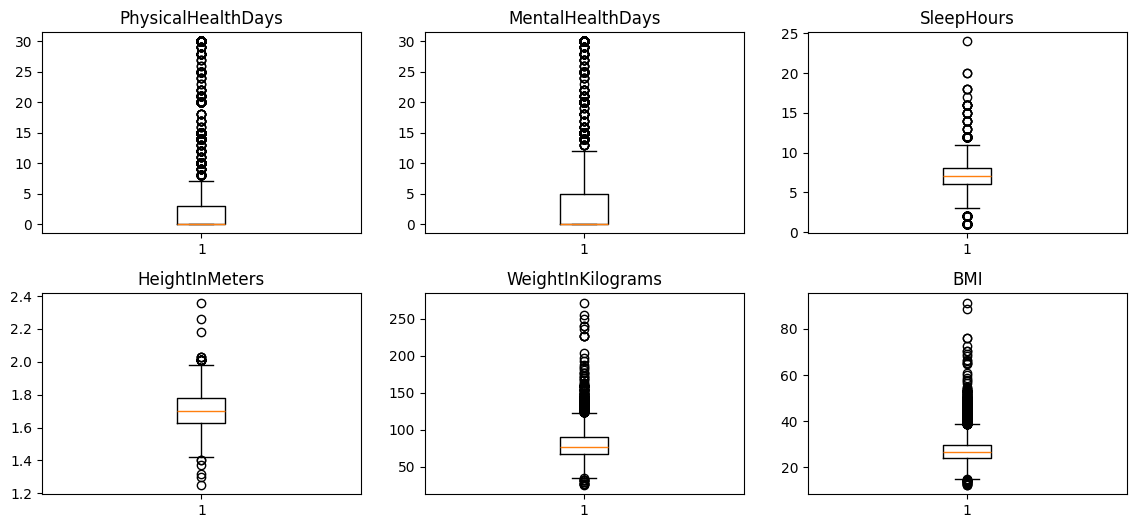

In [20]:
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
axes = axes.flatten()
plt.subplots_adjust(hspace=0.3)

non_nan_num_cols = raw_data[num_col_df.columns]
for i in range(len(axes)):
    axes[i].boxplot(non_nan_num_cols.iloc[:, i]);
    axes[i].set_title(non_nan_num_cols.columns[i])

# **Data preprocessing**

**1. Handle duplicated rows**

In this dataset, there are duplicated rows of data, so we will proceed to remove these rows.

In [21]:
cleaned_data = raw_data.copy
# Remove duplicate rows
cleaned_data = cleaned_data.drop_duplicates()
# Check again
duplicate_rows =  check_duplicates(cleaned_data)

No duplicate rows found


**2. Handling missing values**

- First, the rows of data that have a significant number of missing attributes will be removed from the dataset.

In [22]:
threshold = 0.5 # Define the threshold percentage
# Calculate the percentage of missing values in each row
missing_percentage_row = cleaned_data.isnull().sum(axis = 1)/cleaned_data.shape[1]
# Check for rows with a significant percentage of missing data
rows_with_many_missing_values = cleaned_data[missing_percentage_row > threshold]
# Drop rows with a significant percentage of missing data
cleaned_data = cleaned_data.drop(rows_with_many_missing_values.index)
# Print a message after dropping the rows with a significant percentage of missing data
print(f"Dropped {len(rows_with_many_missing_values)} rows with a significant percentage of missing data.")

Dropped 22 rows with a significant percentage of missing data.


- With numeric columns

In [ ]:
cleaned_data[num_col_df.columns] = cleaned_data[num_col_df.columns].fillna(num_col_df.median())

- With catagorical columns